In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('salary_data_cleaned.csv')

In [14]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,Company_text,job_state,age,r_studio,aws,excel,python,spark
0,Data Scientist,$70K-$95K (Glassdoor est.),Description\n\nPosition at Homes.com\n\nHomes....,4.3,Homes.com\n4.3,"Norfolk, VA",-1,201 to 500 Employees,1998,Company - Private,...,95,82.5,Homes.co,VA,22,0,0,1,1,0
1,Data Scientist,$70K-$95K (Glassdoor est.),STRATACACHE provides salable customer experien...,3.6,STRATACACHE\n3.6,"Dayton, OH",-1,201 to 500 Employees,1999,Company - Private,...,95,82.5,STRATACACH,OH,21,0,0,1,1,0
2,Sr. Scientist,$70K-$95K (Glassdoor est.),Job Description*\nJoin a rapidly growing start...,-1.0,Stealth Mode Startup,"Newark, CA",-1,-1,-1,-1,...,95,82.5,Stealth Mode Startup,CA,-1,0,0,1,0,0
3,Medical Laboratory Scientist,$70K-$95K (Glassdoor est.),Job Summary:\n\nPerforms and interprets tests ...,3.8,Cleveland Clinic\n3.8,"Akron, OH",-1,10000+ Employees,1921,Nonprofit Organization,...,95,82.5,Cleveland Clini,OH,99,0,0,0,0,0
4,Product Development Scientist,$70K-$95K (Glassdoor est.),What we do\n\nAbout United Therapeutics\n\nUni...,3.4,Cleveland Clinic\n3.8,"Akron, OH",-1,501 to 1000 Employees,1996,Company - Public,...,95,82.5,Cleveland Clini,OH,24,0,0,1,0,0


## Functions for unifying the labels

In [15]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [16]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [17]:
df.job_simp.value_counts()

data scientist    292
na                136
data engineer      60
director            7
mle                 3
analyst             2
Name: job_simp, dtype: int64

In [18]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

jr        411
senior     89
Name: seniority, dtype: int64

## Adding description length as a new column

In [19]:
#Job Description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
#df['desc_len']

In [20]:
#Competitor count
df['Competitors'][df['Competitors'] != -1]

Series([], Name: Competitors, dtype: int64)

## Modifying the salary cols.

In [21]:
#Hourly wage to anual, annual = hourly * 2000 approx.
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [22]:
df[['min_salary','max_salary']]

,min_salary,max_salary
0,70,95
1,70,95
2,70,95
3,70,95
4,70,95
...,...,...
495,60,89
496,60,89
497,60,89
498,60,89


In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'age', 'r_studio', 'aws', 'excel',
       'python', 'spark', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [24]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,age,r_studio,aws,excel,python,spark,desc_len
count,500.000000,500.0,500.000000,500.0,500.0,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,3.227600,-1.0,1181.308000,-1.0,0.0,0.0,91.562000,152.088000,121.825000,21.804000,0.002000,0.210000,0.392000,0.63600,0.210000,3903.298000
std,1.791071,0.0,975.137455,0.0,0.0,0.0,18.756059,36.118157,27.176645,42.543925,0.044721,0.407716,0.488686,0.48163,0.407716,1546.105513
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,60.000000,89.000000,74.500000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,668.000000
25%,3.300000,-1.0,-1.000000,-1.0,0.0,0.0,79.000000,130.000000,104.500000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2716.250000
50%,3.750000,-1.0,1958.000000,-1.0,0.0,0.0,94.000000,154.000000,124.000000,7.000000,0.000000,0.000000,0.000000,1.00000,0.000000,3752.500000
75%,4.300000,-1.0,2004.000000,-1.0,0.0,0.0,104.000000,172.000000,138.000000,24.000000,0.000000,0.000000,1.000000,1.00000,0.000000,4847.000000
max,5.000000,-1.0,2019.000000,-1.0,0.0,0.0,132.000000,244.000000,188.000000,395.000000,1.000000,1.000000,1.000000,1.00000,1.000000,10093.000000


## creating hist charts for showing the distribution of continuous variables

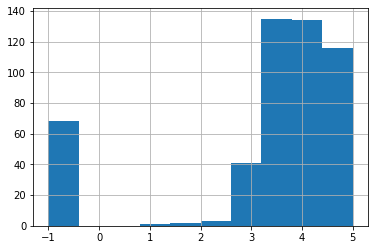

In [25]:
df.Rating.hist()

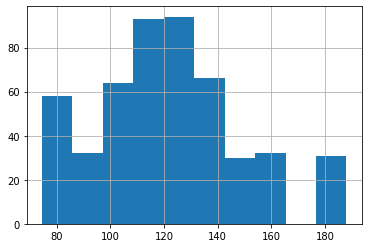

In [26]:
df.avg_salary.hist()

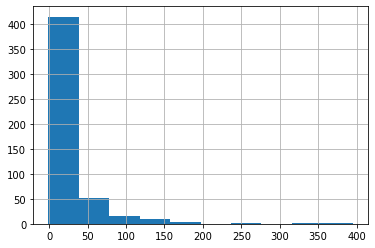

In [27]:
df.age.hist()

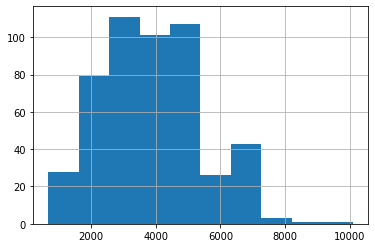

In [28]:
df.desc_len.hist()

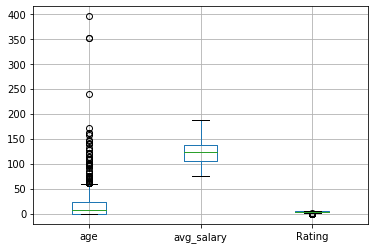

In [29]:
df.boxplot(column = ['age','avg_salary','Rating'])

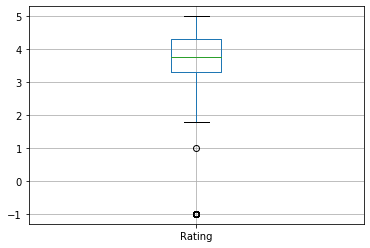

In [30]:
df.boxplot(column = 'Rating')

## Corr between some variables and heatmap

In [31]:
df[['age','avg_salary','Rating']].corr()

,age,avg_salary,Rating
age,1.000000,-0.127305,0.164267
avg_salary,-0.127305,1.000000,0.199511
Rating,0.164267,0.199511,1.000000


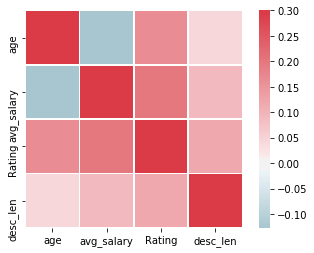

In [32]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), vmax=.3, center = 0, cmap = cmap,
           square = True, linewidth = .5, cbar = {'shrink':.5})

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'age', 'r_studio', 'aws', 'excel',
       'python', 'spark', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

## Bar charts for some cat. variables

In [34]:
df_cat = df[['Location','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Company_text', 'job_state','r_studio', 'aws', 'excel',
       'python', 'spark', 'job_simp', 'seniority']]

graph for Location: total = 149


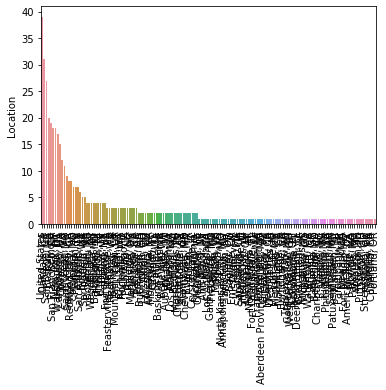

graph for Size: total = 9


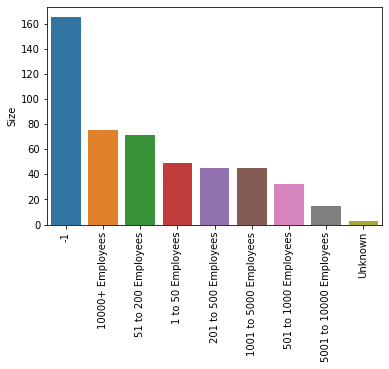

graph for Type of ownership: total = 11


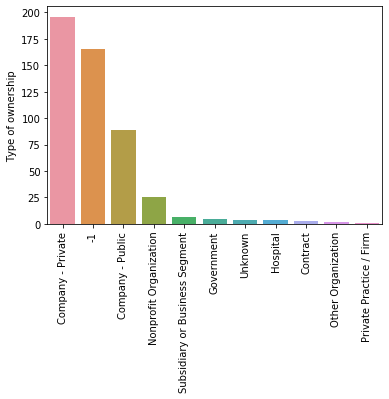

graph for Industry: total = 53


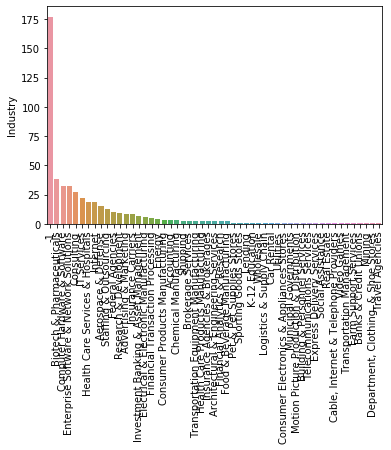

graph for Sector: total = 22


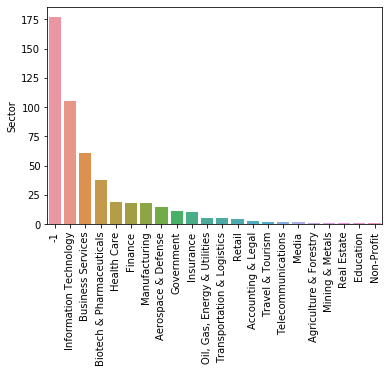

graph for Revenue: total = 14


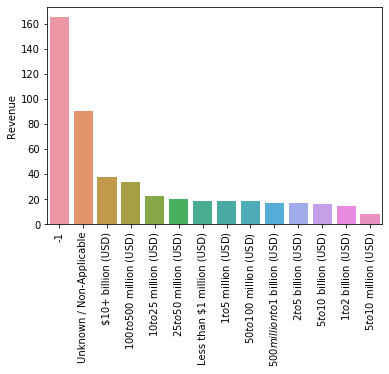

graph for Company_text: total = 268


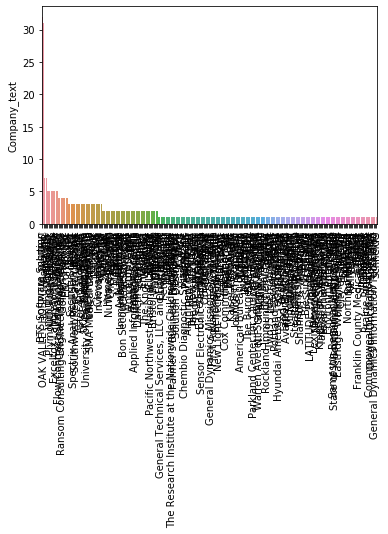

graph for job_state: total = 35


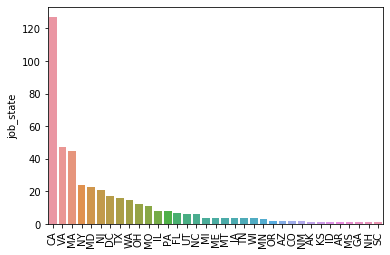

graph for r_studio: total = 2


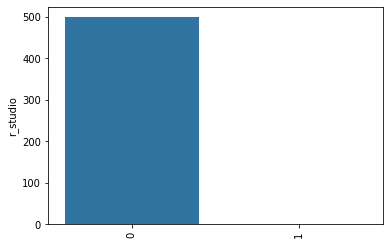

graph for aws: total = 2


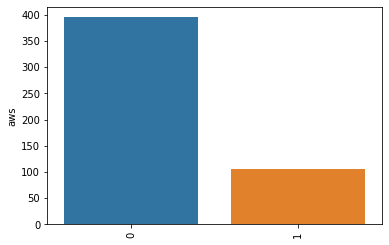

graph for excel: total = 2


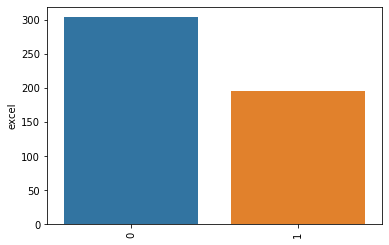

graph for python: total = 2


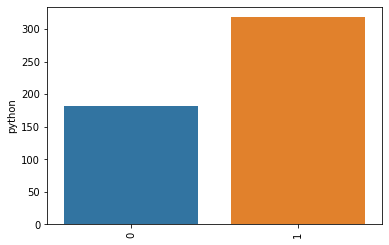

graph for spark: total = 2


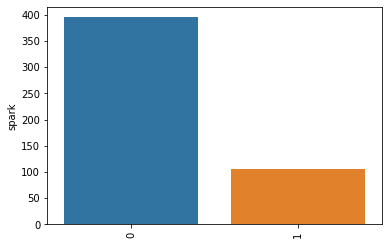

graph for job_simp: total = 6


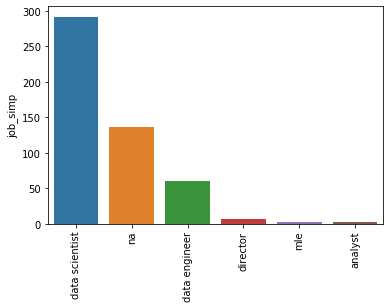

graph for seniority: total = 2


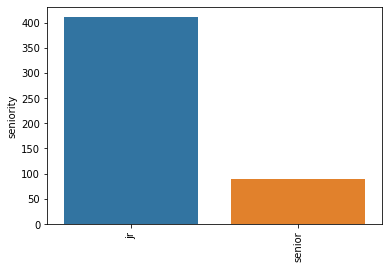

In [35]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f'graph for {i}: total = {len(cat_num)}')
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

graph for Location: total = 20


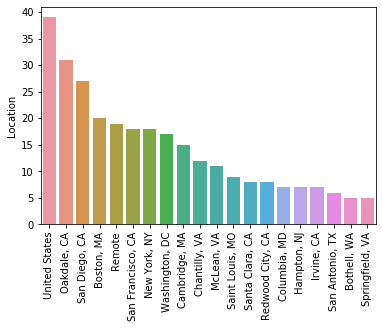

graph for Company_text: total = 20


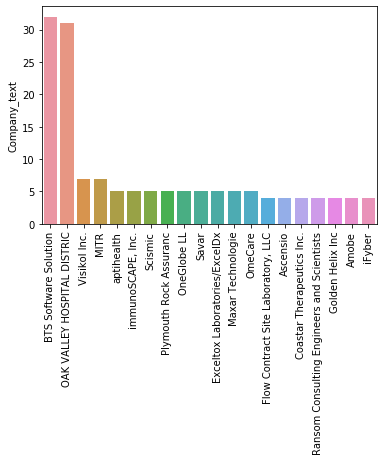

graph for job_state: total = 20


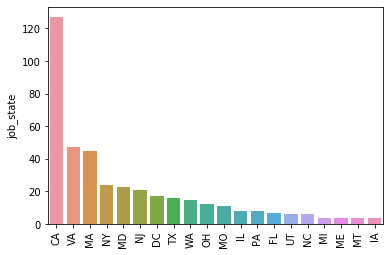

In [36]:
for i in df_cat[['Location','Company_text','job_state']]:
    cat_num = df_cat[i].value_counts()[:20]
    print(f'graph for {i}: total = {len(cat_num)}')
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'age', 'r_studio', 'aws', 'excel',
       'python', 'spark', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [38]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,126.500000
data engineer,114.891667
data scientist,126.388699
director,134.785714
mle,116.833333
na,114.459559


In [39]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr         126.500000
data engineer  jr         113.487805
               senior     117.921053
data scientist jr         126.590909
               senior     125.410000
director       jr         111.750000
               senior     144.000000
mle            jr         116.833333
na             jr         115.690083
               senior     104.533333

In [40]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state',ascending = False)

avg_salary
job_state job_simp                  
WI        na                       1
          data scientist           3
WA        na                       6
          data scientist           9
VA        na                       6
          mle                      1
          data scientist          29
          data engineer           11
UT        data engineer            2
          data scientist           4
TX        na                       3
          data scientist           8
          data engineer            4
          analyst                  1
TN        na                       2
          data scientist           2
SC        na                       1
PA        data scientist           2
          data engineer            1
          na                       5
OR        na                       1
          data scientist           1
OH        na                       5
          data scientist           7
NY        na                       6
          data scientist          18
NM        na                       2
NJ        na                      11
          director                 2
          data scientist           8
NH        na                       1
NC        na                       1
          data scientist           3
          data engineer            2
MT        na                       4
MS        data scientist           1
MO        data scientist          10
          data engineer            1
MN        data scientist           2
          data engineer            1
MI        data scientist           2
          data engineer            2
ME        na                       4
MD        na                       8
          data scientist          13
          data engineer            2
MA        na                       4
          mle                      1
          director                 5
          data scientist          29
          data engineer            6
KS        data scientist           1
IL        data engineer            3
          data scientist           4
          na                       1
ID        na                       1
IA        data scientist           3
          data engineer            1
GA        data scientist           1
FL        analyst                  1
          na                       1
          data scientist           4
          data engineer            1
DC        data scientist          12
          data engineer            5
CO        data scientist           1
          data engineer            1
CA        mle                      1
          data scientist          63
          data engineer            4
          na                      59
AZ        data engineer            2
AR        data scientist           1
AK        na                       1

In [41]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = ['avg_salary']).sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
KS,157.500000
MS,144.000000
WI,132.500000
VA,130.896552
DC,130.750000
MO,128.300000
NY,125.972222
TX,125.812500
WA,124.833333


In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_text', 'job_state', 'age', 'r_studio', 'aws', 'excel',
       'python', 'spark', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [43]:
# salary by rating, industry, sector, revenue, hourly, employer provided, python, r, spark, aws excel, desc_len, type of ownership
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided','r_studio', 'aws', 'excel', 'python', 'spark','desc_len','Type of ownership','avg_salary']]

In [44]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(i)
        print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.9    168.406977
 4.7    144.166667
 1.8    144.000000
 1.9    138.000000
 2.2    138.000000
 2.3    138.000000
 4.2    132.590909
 3.9    130.538462
 4.6    127.714286
 1.0    124.000000
 3.0    123.583333
 3.3    122.000000
 4.5    121.595238
 2.7    120.250000
 4.8    119.937500
 4.0    119.444444
 3.5    118.928571
 5.0    118.428571
 3.7    117.394737
 3.4    117.045455
 4.3    115.766667
 2.9    115.700000
 2.8    115.307692
 4.4    115.076923
-1.0    114.117647
 3.8    112.130435
 3.2    112.000000
 3.6    111.388889
 4.1    110.903226
 2.6    110.250000
 3.1    107.807692
 2.5    104.500000
Industry
                                          avg_salary
Industry                                            
Consumer Electronics & Appliances Stores  157.500000
Building & Personnel Services             157.500000
K-12 Education                            157.500000
Logistics & Supply Chain                  144.000000
Municipal Government

In [45]:
df.pivot_table(index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),4,11
$1 to $5 million (USD),4,15
$10 to $25 million (USD),13,10
$10+ billion (USD),10,28
$100 to $500 million (USD),9,25
$2 to $5 billion (USD),3,14
$25 to $50 million (USD),7,13
$5 to $10 billion (USD),5,11
$5 to $10 million (USD),5,3


In [52]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

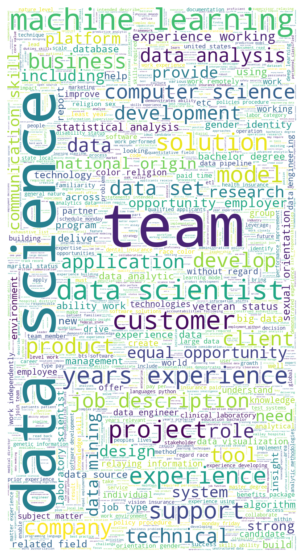

In [61]:
words = ' '.join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuacion and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
                 
words_filtered = punctuation_stop(words)

text = ' '.join([ele for ele in words_filtered])

wc = WordCloud(background_color = 'white', random_state = 1, stopwords = STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)
                 
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()
